1)From which manufacturing year to which manufacturing year vehicles are present in this data ?
2)What is the lowest price to which a vehicle is sold ?
3)What is the highest price to which a vehicle is sold ?
4)How many records are there in this data ?
5)Are there any missing records in this data ?
6)How many different vehicles are present in this data ?
7)Which is the most sold vehicle in this data ?
8)Does the database include any CNG vehicle ? If yes how many of them are there ?
9)How many vehicles here are for sell from Individuals directly ?
10)Does this database contain auto transmission vehicles ? If yes how many of them are there ?
11)How many single person owned vehicles are there in this database ?
12)Which is the most and least cost depreciated vehicle in data ?
13)Which brands of vehicles are less affected by cost depreciation ?
14)Are there any factors which you feel affect the cost depreciation ?
15)In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
16)Can we get idea about newest vehicles i.e. after 2014 manufactured ?
17)Can we find out data of only two wheelers from this data ?
Which is the oldest bike sold here?
18)Which is the newest bike sold here?
19)Which is the most sold bike here?
20)Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
21)Can we find out data of only cars from this data ?
22)Which is the oldest car sold here?
23)Which is the newest car sold here?
24)Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [3]:
import pandas as pd
df=pd.read_csv("/content/car_Dekho_DA.csv")

In [11]:
#1 From which manufacturing year to which manufacturing year vehicles are present in this data ?
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
#2)What is the lowest price to which a vehicle is sold ?
print(df.columns)
df["Selling_Price"].min()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


0.1

In [18]:
# 3)What is the highest price to which a vehicle is sold ?
df["Selling_Price"].max()

35.0

In [22]:
#4)How many records are there in this data ?
records=df.shape
print(f"no of recordds{records}")

no of recordds(301, 9)


In [21]:
#5)Are there any missing records in this data ?
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
#6)How many different vehicles are present in this data ?
a=df["Car_Name"].unique()
print(f"no of different vehicles is {len(a)}")

no of different vehicles is 98


In [29]:
#7)Which is the most sold vehicle in this data ?
most_sold_vehicle=df["Car_Name"].mode()
print(f"most sold vehicle is {most_sold_vehicle}")

most sold vehicle is 0    city
Name: Car_Name, dtype: object


In [34]:
#8)Does the database include any CNG vehicle ?
a=(df["Fuel_Type"]=='CNG').sum()
print(f"no of CNG type vehicles is {a}")

no of different fuel type is 2


In [35]:
#9)How many vehicles here are for sell from Individuals directly ?
a=(df["Seller_Type"]=='Individual').sum()
print(f"no of Individual type vehicles is {a}")

no of Individual type vehicles is 106


In [36]:
#10)Does this database contain auto transmission vehicles ? If yes how many of them are there ?
a=(df["Transmission"]=='Automatic').sum()
print(f"no of Automatic type vehicles is {a}")

no of Automatic type vehicles is 40


In [37]:
# 11)How many single person owned vehicles are there in this database ?
a=(df["Owner"]=='1st owner').sum()
print(f"no of 1st owner type vehicles is {a}")

no of 1st owner type vehicles is 0


In [40]:
# 12)Which is the most and least cost depreciated vehicle in data ?
df['depriciation'] = df['Present_Price'] - df['Selling_Price']
a=df.loc[df.depriciation == df.depriciation.max()]
print(a)

        Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
86  land cruiser  2010           35.0           92.6       78000    Diesel   

   Seller_Type Transmission  Owner  depriciation  
86      Dealer       Manual      0          57.6  


In [41]:
# 12 th one for leaast
df['depriciation'] = df['Present_Price'] - df['Selling_Price']
a=df.loc[df.depriciation == df.depriciation.min()]
print(a)

            Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
155  Honda Activa 4G  2017           0.48           0.51        4300   

    Fuel_Type Seller_Type Transmission  Owner  depriciation  
155    Petrol  Individual    Automatic      0          0.03  


<Axes: xlabel='Transmission'>

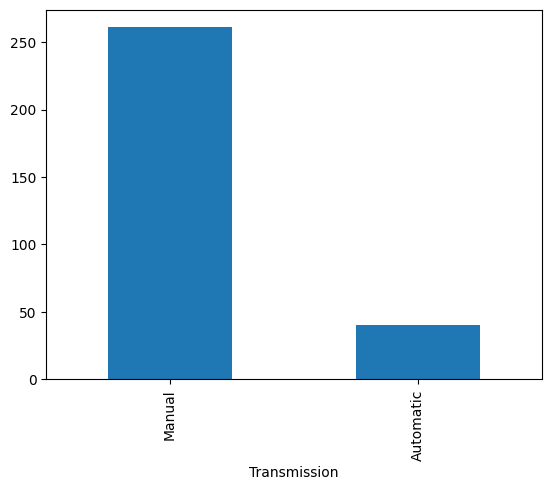

In [43]:
#13)Which brands of vehicles are less affected by cost depreciation ?
df.Transmission.value_counts().plot.bar()

<Axes: xlabel='count', ylabel='Car_Name'>

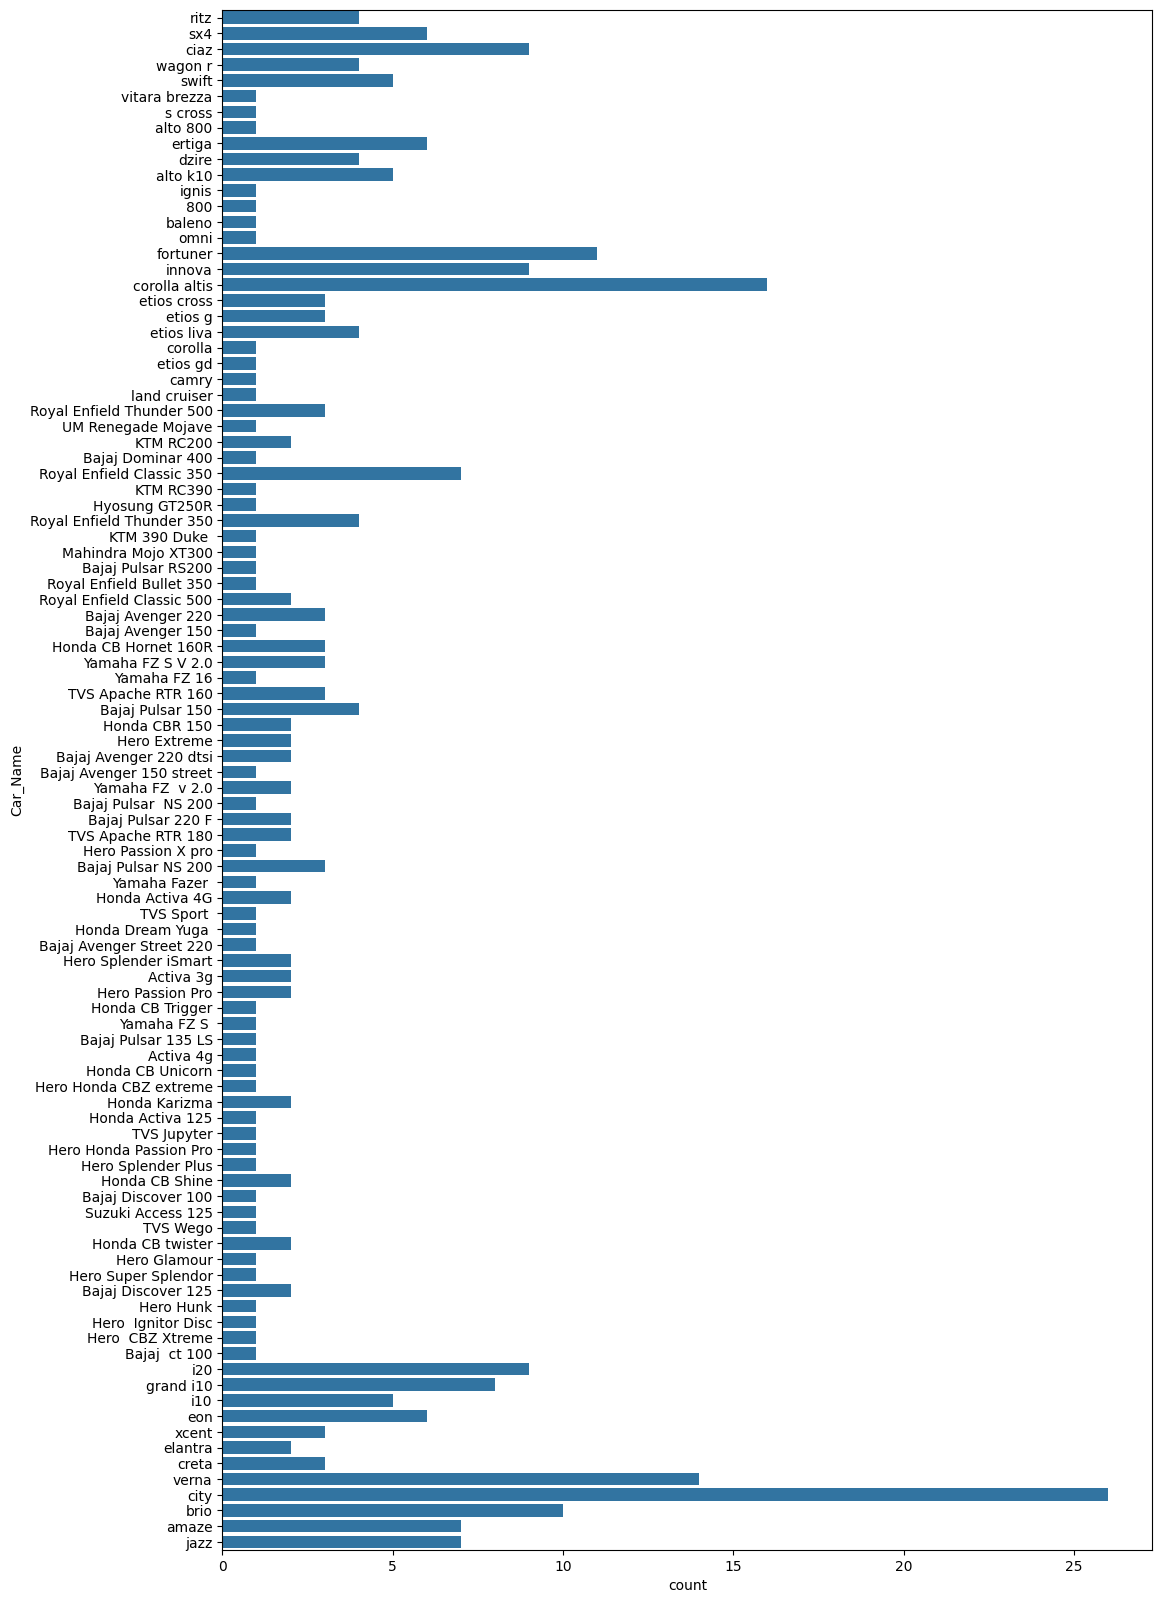

In [18]:
#14)Are there any factors which you feel affect the cost depreciation ?

import matplotlib.pyplot as plt
import seaborn as sns
fig_dims=(12,20)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(y=df.Car_Name,ax=ax,data=df)


<Axes: xlabel='Fuel_Type'>

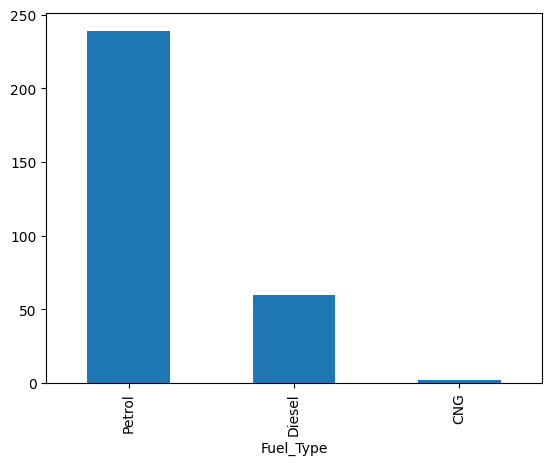

In [48]:
# 2nd factor effectinho on deprecition
df.Fuel_Type.value_counts().plot.bar()

<Axes: xlabel='Seller_Type'>

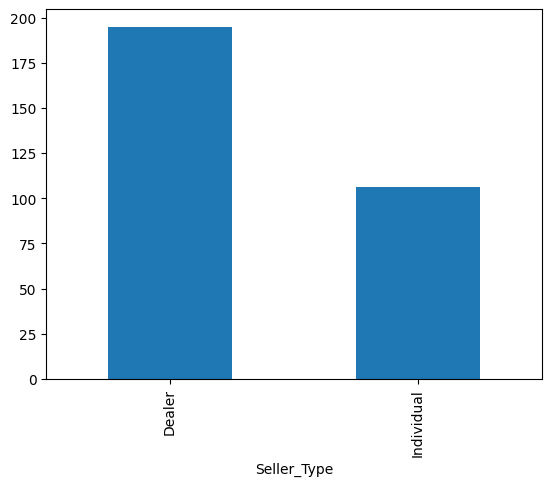

In [50]:
# 3rd factor seller type
df.Seller_Type.value_counts().plot.bar()

<Axes: xlabel='Vehicle_Age', ylabel='Selling_Price'>

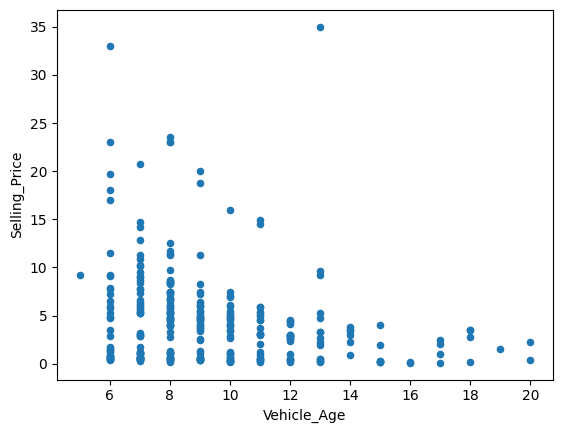

In [52]:
#15)In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
current_year = 2023  # Replace with the current year if needed
df['Vehicle_Age'] = current_year - df['Year']
df.plot(x='Vehicle_Age', y='Selling_Price', kind='scatter')

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

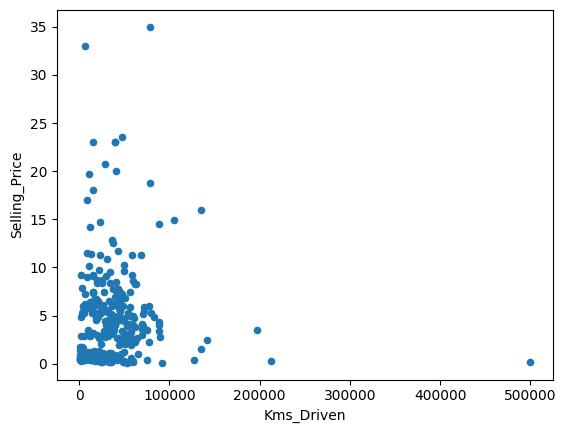

In [55]:
# sellinprice effecting on kms driven
df.plot(x='Kms_Driven',y='Selling_Price',kind='scatter')

In [58]:
#16)Can we get idea about newest vehicles i.e. after 2014 manufactured ?
new=df[df['Year']>=2015]
new.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation,Vehicle_Age
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,5
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37,8
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11,8
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14,7


In [4]:
#17)Can we find out data of only two wheelers from this data ? Which is the oldest bike sold here?
two_wheelers = df[df["Present_Price"]<3.5]
two_wheelers.reset_index(drop=True,inplace=True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0


In [6]:
# contuing the 17th question (alto,800,omini) are the cars so we want to remove that cars and print the remainig two vehicler table
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0


In [8]:
# to find minimum vehicle for contuing 17th question
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
92,Hero Super Splendor,2005,0.2,0.57,55000,Petrol,Individual,Manual,0


In [15]:
# 18  Which is the newest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
12,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
29,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0
31,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0
32,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0
33,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0
35,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0


In [16]:
# 19 Which is the most sold bike here?
most_sold_bike = two_wheelers.groupby('Car_Name')['Selling_Price'].sum().idxmax()

print(f"The most sold bike is: {most_sold_bike}")

The most sold bike is: Royal Enfield Classic 350


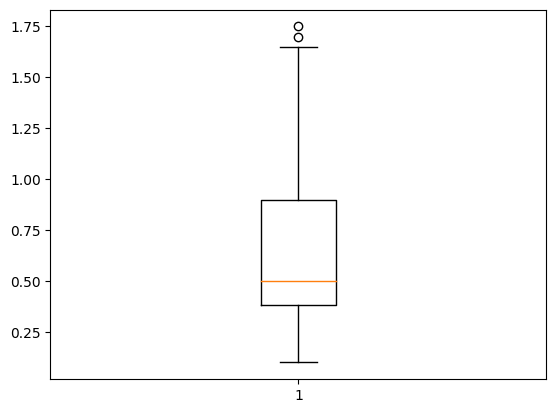

In [19]:
# 20)Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

In [22]:
#21)Can we find out data of only cars from this data ?
cars = df[df["Present_Price"]>1.6]
cars.reset_index(drop=True,inplace=True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
#22)Which is the oldest car sold here?
cars.loc[cars.Year == cars.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0


In [24]:
#23)Which is the newest car sold here?
cars.loc[cars.Year == cars.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


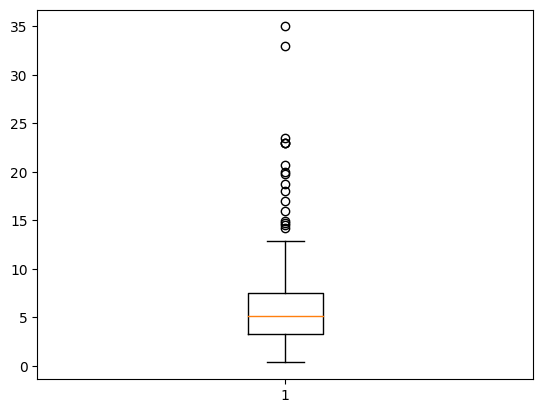

In [27]:
#24)Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?
plt.boxplot(cars.Selling_Price)
plt.show()

<Axes: xlabel='count', ylabel='Car_Name'>

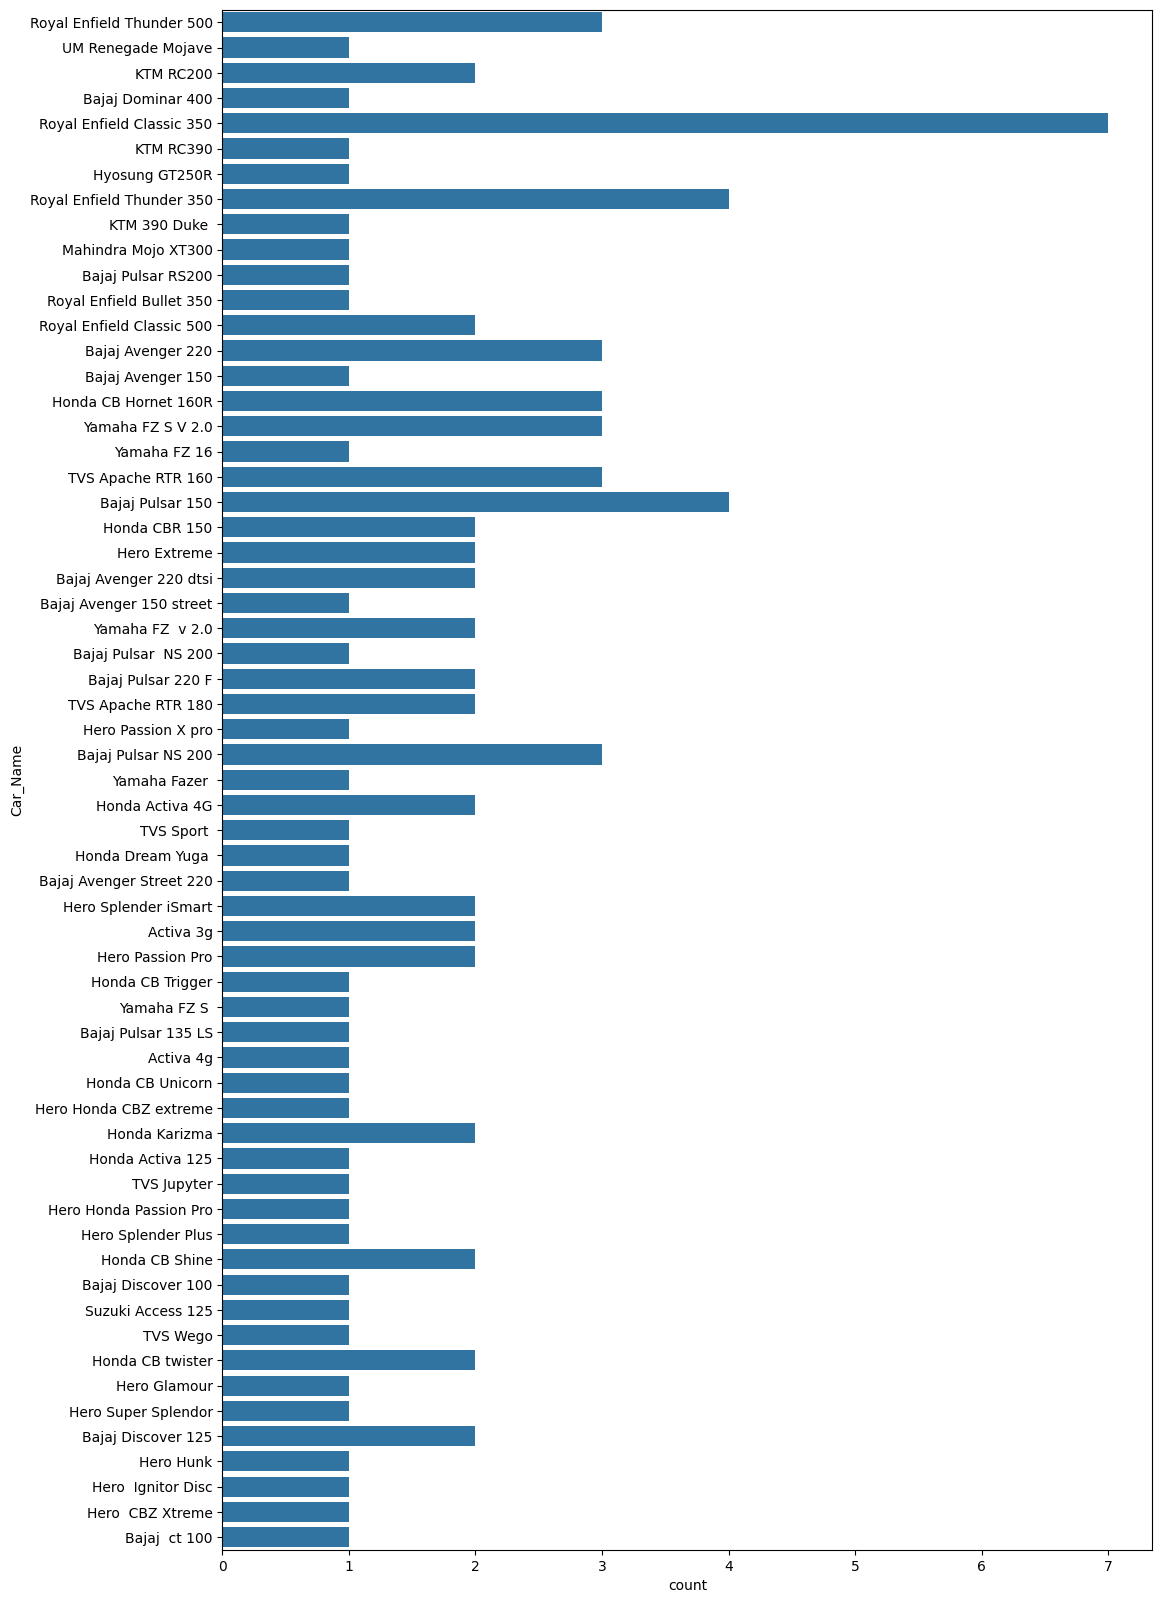

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = two_wheelers.Car_Name,ax = ax ,data = two_wheelers)